In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)
import cartopy.util as cutil
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import xarray as xr
import os
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import sys
sys.path.insert(0, '/Users/huripari/Documents/PhD/TCs_Genesis/FS_TCG')
import utils_results as ut

In [20]:
basin = 'NA'
n_clusters = 12
cluster_data_dir = f'{basin}_{n_clusters}clusters_noTS'
project_dir = '/Users/huripari/Documents/PhD/TCs_Genesis'
data_dir = os.path.join(project_dir, 'data')
years = np.arange(1980, 2022, 1)
date_range = pd.date_range(start=f'1980-01-01', end=f'2021-12-01', freq='MS')

In [32]:
var = 'w'
file_path = os.path.join(cluster_data_dir, f'averages_{var}.csv')
df_var = pd.read_csv(file_path, index_col=0)
df_var.index = pd.to_datetime(df_var.index)
df = df_var[df_var.index.isin(date_range)]
fig_path = os.path.join(cluster_data_dir, 'figures', f'{var}.pdf')
fig_var_clusters = ut.load_pdf_convert_to_image(fig_path)

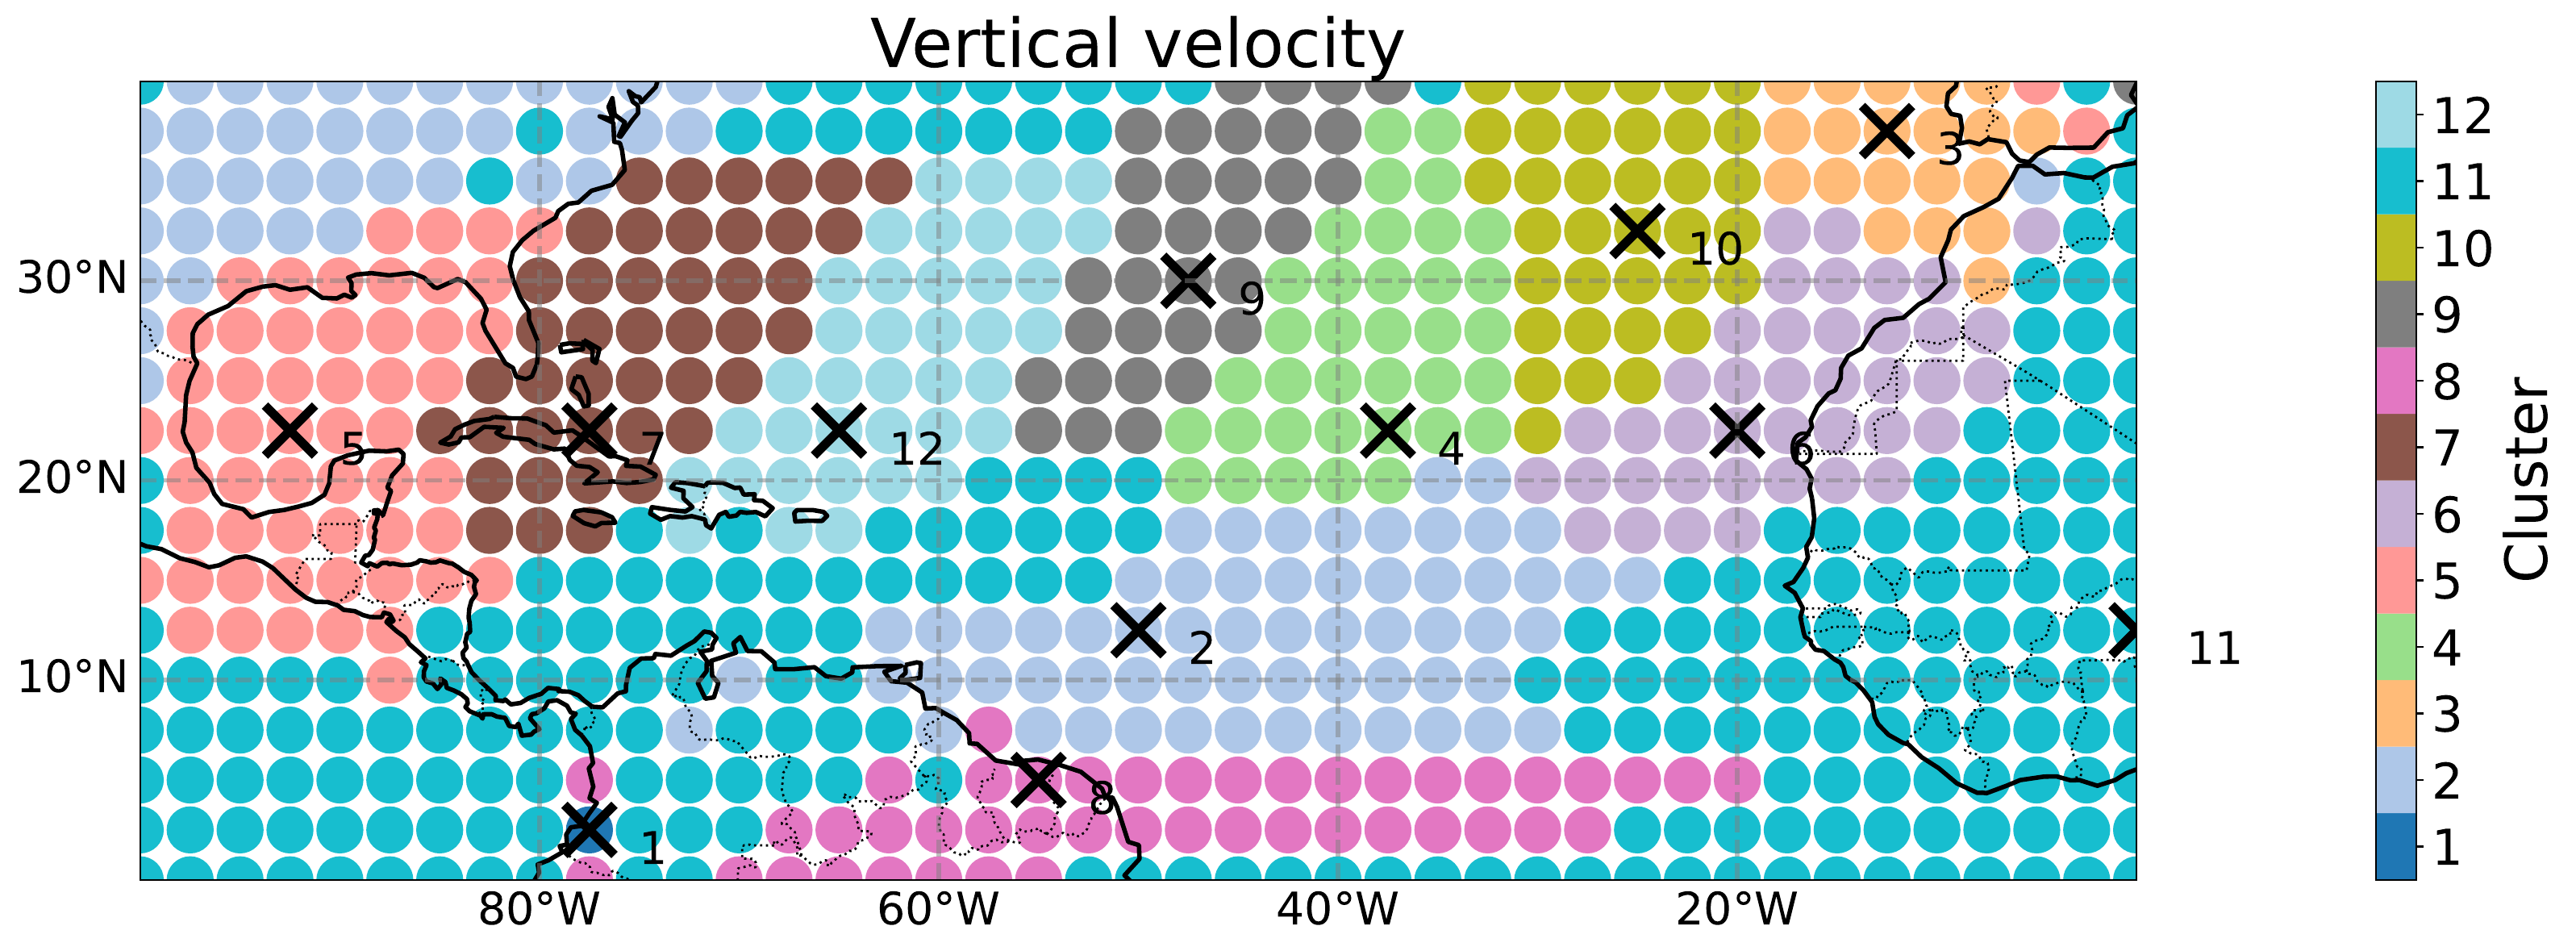

In [33]:
display(fig_var_clusters)

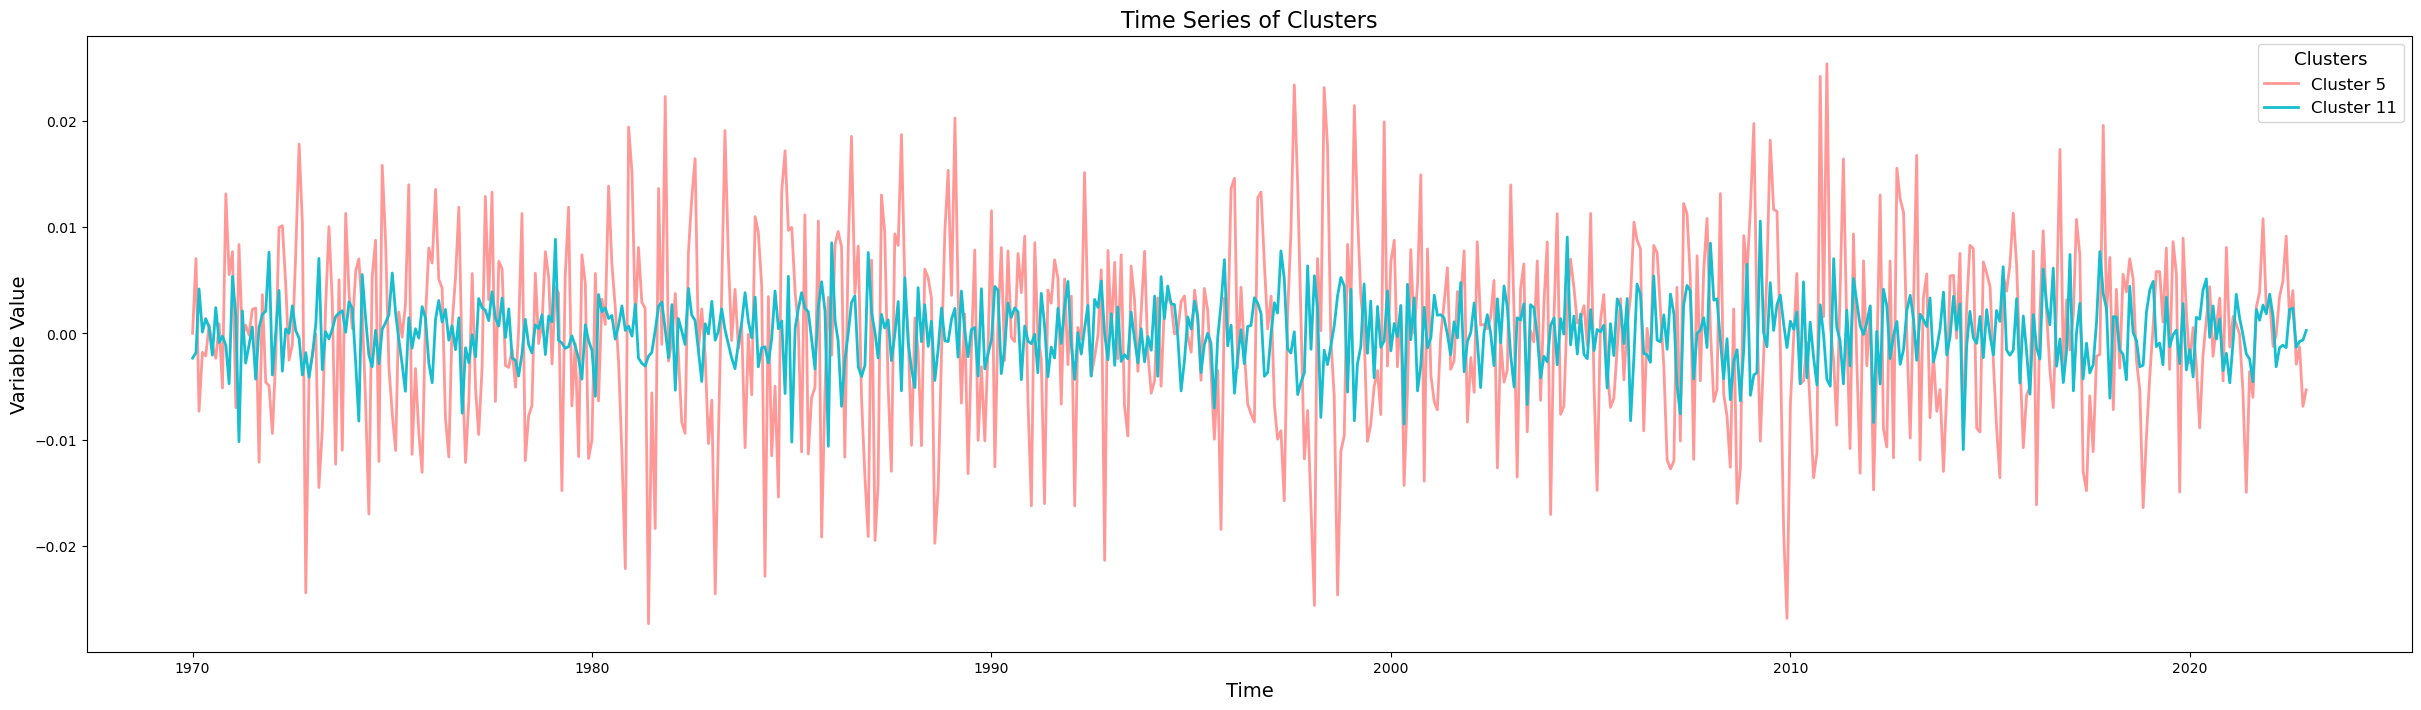

In [35]:
if n_clusters > 10:
    cmap = plt.get_cmap(f'tab20', n_clusters)
else:
    cmap = plt.get_cmap(f'tab10', n_clusters) 
fig, ax = plt.subplots(figsize=(30, 8))
# Plot each cluster as a time series
for cluster_id in [5, 11]:
    color = cmap(cluster_id - 1)  # Get the corresponding color
    ax.plot(df_var.index, df_var.iloc[:, cluster_id - 1], label=f'Cluster {cluster_id}', color=color, linewidth=2)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Variable Value", fontsize=14)
ax.set_title("Time Series of Clusters", fontsize=16)
ax.legend(title="Clusters", fontsize=12, title_fontsize=13)
plt.show()

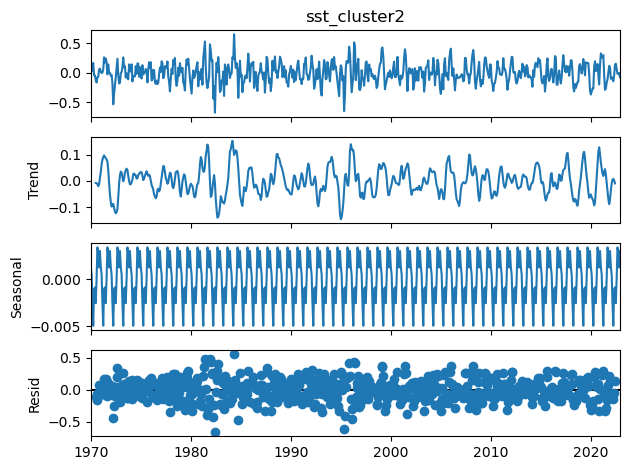

In [11]:
decomp = seasonal_decompose(df_var.iloc[:, 1], model='additive', period=12)
decomp.plot();

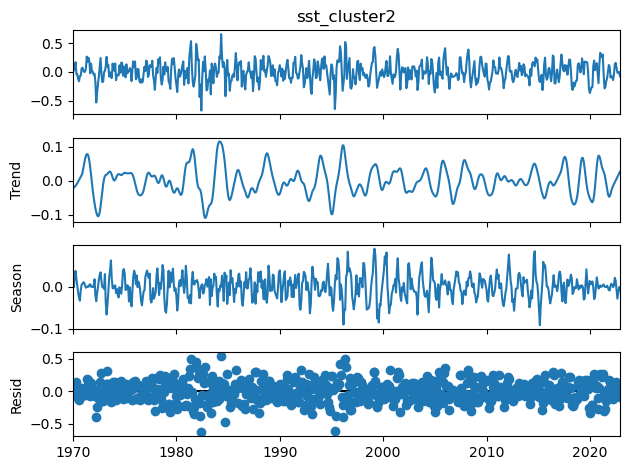

In [12]:
decomp = STL(df_var.iloc[:, 1], period=12).fit()
decomp.plot();

In [13]:
index_variables = ['AMM', 'ENSO3.4', 'NAO', 'PDO', 'PNA', 'SOI', 'TNA', 'TSA', 'WP']
project_dir = '/Users/huripari/Documents/PhD/TCs_Genesis'
indexes_path = os.path.join(project_dir, 'data', 'CI')

In [14]:
date_range = pd.date_range(start=f'1980-01-01', end=f'2021-12-01', freq='MS')
df_indeces = pd.DataFrame(index=date_range, columns=index_variables)
df_season_indeces = pd.DataFrame(index=date_range, columns=index_variables)
df_trend_indeces = pd.DataFrame(index=date_range, columns=index_variables)
df_residual_indeces = pd.DataFrame(index=date_range, columns=index_variables)
for climate_index in index_variables:
    filename = os.path.join(indexes_path, climate_index + '.txt')
    data = pd.read_table(filename, sep='\s+', header=None)
    for r, row in enumerate(df_indeces.iterrows()):
        idx = df_indeces.index[r]
        month = idx.month
        year = idx.year
        df_indeces.loc[idx, climate_index] = data[(data[0] == year)][month].values[0]
    decomp_indeces = STL(df_indeces[climate_index], period=12).fit()
    df_season_indeces[climate_index] = decomp_indeces.seasonal
    df_trend_indeces[climate_index] = decomp_indeces.trend
    df_residual_indeces[climate_index] = decomp_indeces.resid
        

In [15]:
df_indeces

,AMM,ENSO3.4,NAO,PDO,PNA,SOI,TNA,TSA,WP
1980-01-01,2.99,0.54,-1.38,-0.11,-1.01,0.7,0.4,-0.15,-1.71
1980-02-01,3.35,0.22,-0.39,1.32,2.03,0.5,0.41,-0.34,-0.5
1980-03-01,3.01,0.03,-0.73,1.09,-0.64,-0.7,0.17,-0.26,1.09
1980-04-01,4.19,-0.07,1.26,1.49,1.66,-1.0,0.56,-0.11,0.72
1980-05-01,5.1,0.08,-1.34,1.2,-0.16,-0.0,0.71,-0.04,1.85
...,...,...,...,...,...,...,...,...,...
2021-08-01,-2.29,-0.53,-0.49,-1.12,0.93,1.0,0.26,0.92,-1.94
2021-09-01,1.31,-0.55,-0.06,-1.53,0.33,1.3,0.54,0.58,-0.65
2021-10-01,1.83,-0.94,-1.98,-2.55,1.41,1.2,0.46,0.65,1.74
2021-11-01,3.18,-0.94,-0.33,-2.52,0.68,1.6,0.42,0.5,-0.15


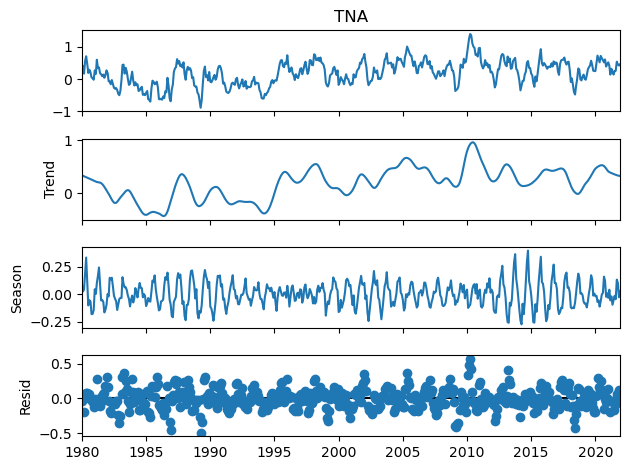

In [17]:
decomp = STL(df_indeces.iloc[:, 6]).fit()
decomp.plot();

In [18]:
decomp.resid.to_frame()

,resid
1980-01-01,-0.029978
1980-02-01,0.054058
1980-03-01,-0.193600
1980-04-01,0.056375
1980-05-01,0.073413
...,...
2021-08-01,-0.043437
2021-09-01,0.065810
2021-10-01,0.022334
2021-11-01,0.116432


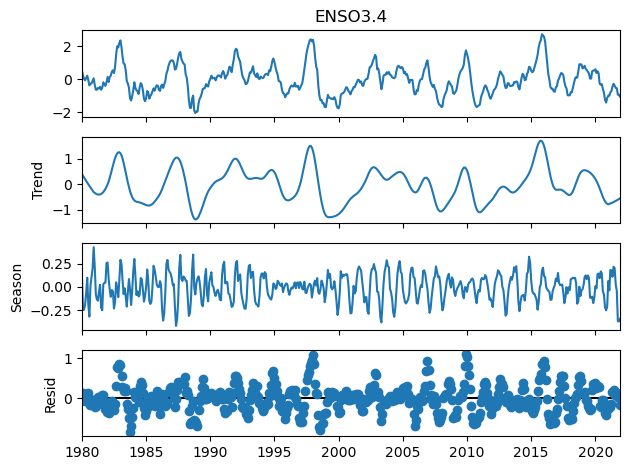

In [141]:
decomp = STL(df_indeces.iloc[:, 1], period=12).fit()
decomp.plot();

In [144]:
decomp.observed

1980-01-01    0.54
1980-02-01    0.22
1980-03-01    0.03
1980-04-01   -0.07
1980-05-01    0.08
              ... 
2021-08-01   -0.53
2021-09-01   -0.55
2021-10-01   -0.94
2021-11-01   -0.94
2021-12-01   -1.06
Freq: MS, Name: ENSO3.4, Length: 504, dtype: object